In [3]:
import numpy as np
import os
import matplotlib.pyplot as plt
import pandas as pd
  
# fetch dataset 
df = pd.read_csv('phishing.csv')
  
# data (as pandas dataframes) 
x = df.drop(columns=['Result'])  # Features
y = df['Result']  # Target variable 

# Display dataset information
print("Dataset Info:")
print(df.info())

# Show first few rows
print("\nFirst few rows of the dataset:")
print(df.head())

# Check for metadata (not present by default in Pandas)
# Instead of phishing_websites.metadata, check column names
print("\nColumn Names:")
print(df.columns)

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11055 entries, 0 to 11054
Data columns (total 31 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   having_IP_Address            11055 non-null  int64
 1   URL_Length                   11055 non-null  int64
 2   Shortining_Service           11055 non-null  int64
 3   having_At_Symbol             11055 non-null  int64
 4   double_slash_redirecting     11055 non-null  int64
 5   Prefix_Suffix                11055 non-null  int64
 6   having_Sub_Domain            11055 non-null  int64
 7   SSLfinal_State               11055 non-null  int64
 8   Domain_registeration_length  11055 non-null  int64
 9   Favicon                      11055 non-null  int64
 10  port                         11055 non-null  int64
 11  HTTPS_token                  11055 non-null  int64
 12  Request_URL                  11055 non-null  int64
 13  URL_of_Anchor                110

In [4]:
#Features of the Dataset
print(df.columns) #list all feature names

Index(['having_IP_Address', 'URL_Length', 'Shortining_Service',
       'having_At_Symbol', 'double_slash_redirecting', 'Prefix_Suffix',
       'having_Sub_Domain', 'SSLfinal_State', 'Domain_registeration_length',
       'Favicon', 'port', 'HTTPS_token', 'Request_URL', 'URL_of_Anchor',
       'Links_in_tags', 'SFH', 'Submitting_to_email', 'Abnormal_URL',
       'Redirect', 'on_mouseover', 'RightClick', 'popUpWidnow', 'Iframe',
       'age_of_domain', 'DNSRecord', 'web_traffic', 'Page_Rank',
       'Google_Index', 'Links_pointing_to_page', 'Statistical_report',
       'Result'],
      dtype='object')


Result
 1    6157
-1    4898
Name: count, dtype: int64


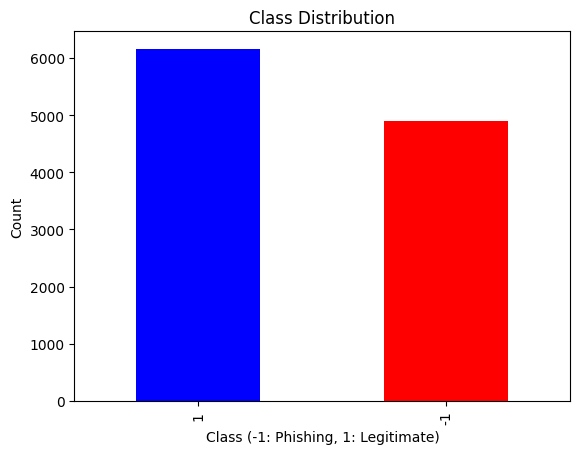

In [5]:
#Dataset Distribution 

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


df = pd.read_csv("Phishing.csv")
print(df['Result'].value_counts())

# Visualization
df['Result'].value_counts().plot(kind='bar', color=['blue', 'red'], title="Class Distribution")
plt.xlabel("Class (-1: Phishing, 1: Legitimate)")
plt.ylabel("Count")
plt.show()

In [6]:
#Feature Types and Encoding 

from sklearn.preprocessing import LabelEncoder

encoder= LabelEncoder () 
df['HTTPS_token'] = encoder.fit_transform(df['HTTPS_token'])

In [7]:
#Decision Tree

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree 
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix 
from sklearn.metrics import f1_score

# Define features and target variable
x = df.drop(columns=['Result'])  # Features
y = df['Result']  # Target (Phishing or Legitimate)

#Split into train and test sets (80% train, 20% test)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

#Create and train the Decision Tree Classifier 
clf = DecisionTreeClassifier(random_state=42) 
clf.fit(x_train, y_train)

#Predict on test set 
y_pred = clf.predict(x_test)

#Evaluation 
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred)) 

#Calculate F1 Score (binary classification, so use average binary") 
f1= f1_score(y_test, y_pred) 
print("F1 Score:", f1)

Accuracy: 0.9574853007688828

Classification Report:
               precision    recall  f1-score   support

          -1       0.95      0.95      0.95       956
           1       0.96      0.96      0.96      1255

    accuracy                           0.96      2211
   macro avg       0.96      0.96      0.96      2211
weighted avg       0.96      0.96      0.96      2211

F1 Score: 0.9625498007968127


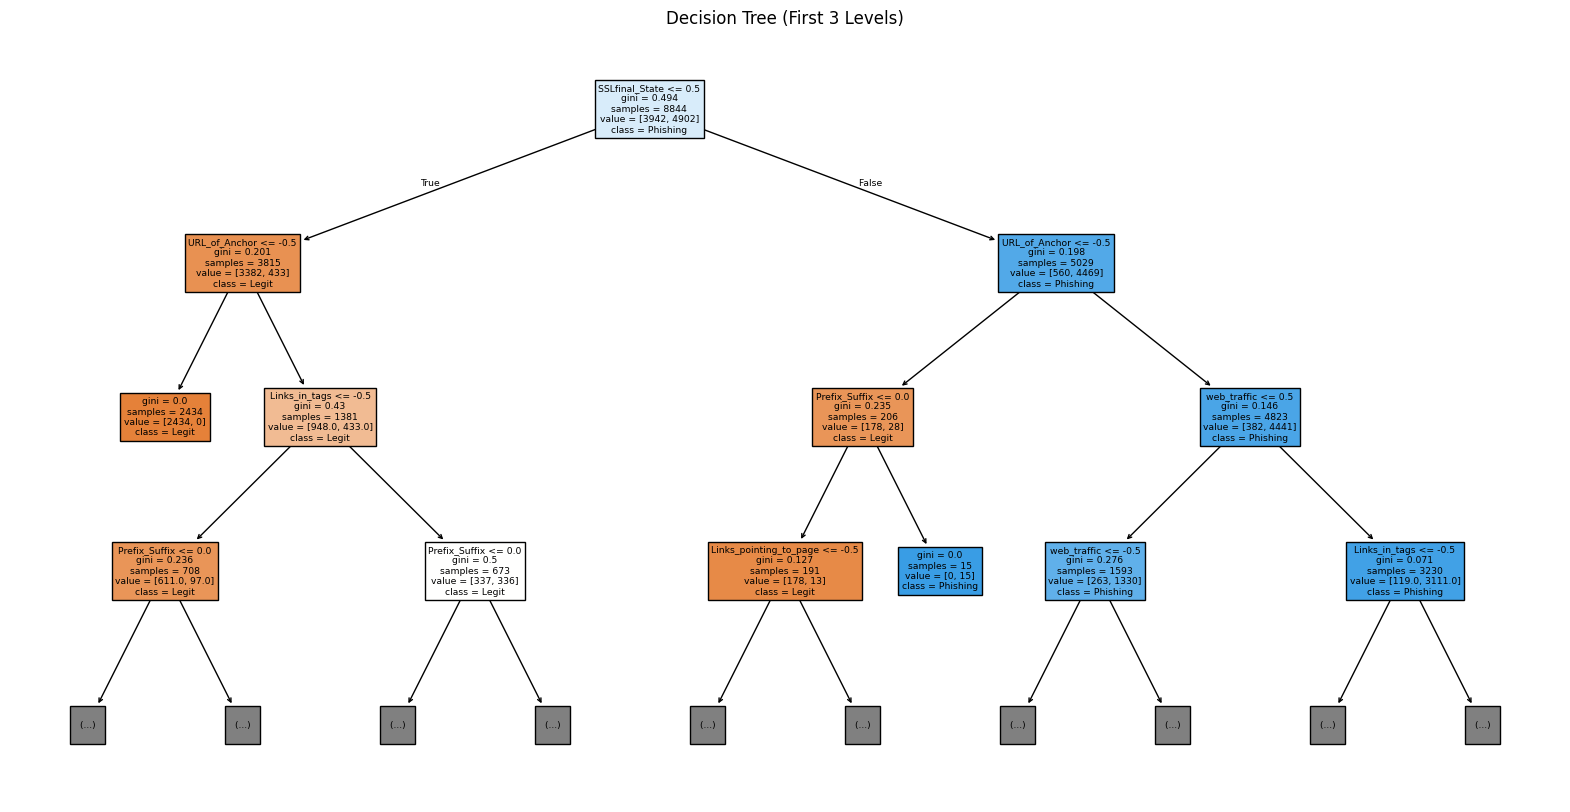

In [8]:
# Visualize the Decision Tree (top levels only for readability)
plt.figure(figsize=(20,10))
plot_tree(clf, feature_names=x.columns, class_names=["Legit", "Phishing"], filled=True, max_depth=3)
plt.title("Decision Tree (First 3 Levels)")
plt.show()

In [9]:
#Confusion Matrix 

from sklearn.ensemble import RandomForestClassifier

# Train model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(x_train, y_train)

# Evaluate model
predictions = model.predict(x_test)
accuracy = accuracy_score(y_test, predictions)


# Confusion matrix plot
results = confusion_matrix(y_test, predictions)

target_names = [str(label) for label in sorted(y.unique())]

confusion_df = pd.DataFrame(results,
        columns = ["Predicted " + str(classname) for classname in target_names], 
        index=["Class " + str(classname) for classname in target_names])
print(confusion_df)

          Predicted -1  Predicted 1
Class -1           909           47
Class 1             26         1229


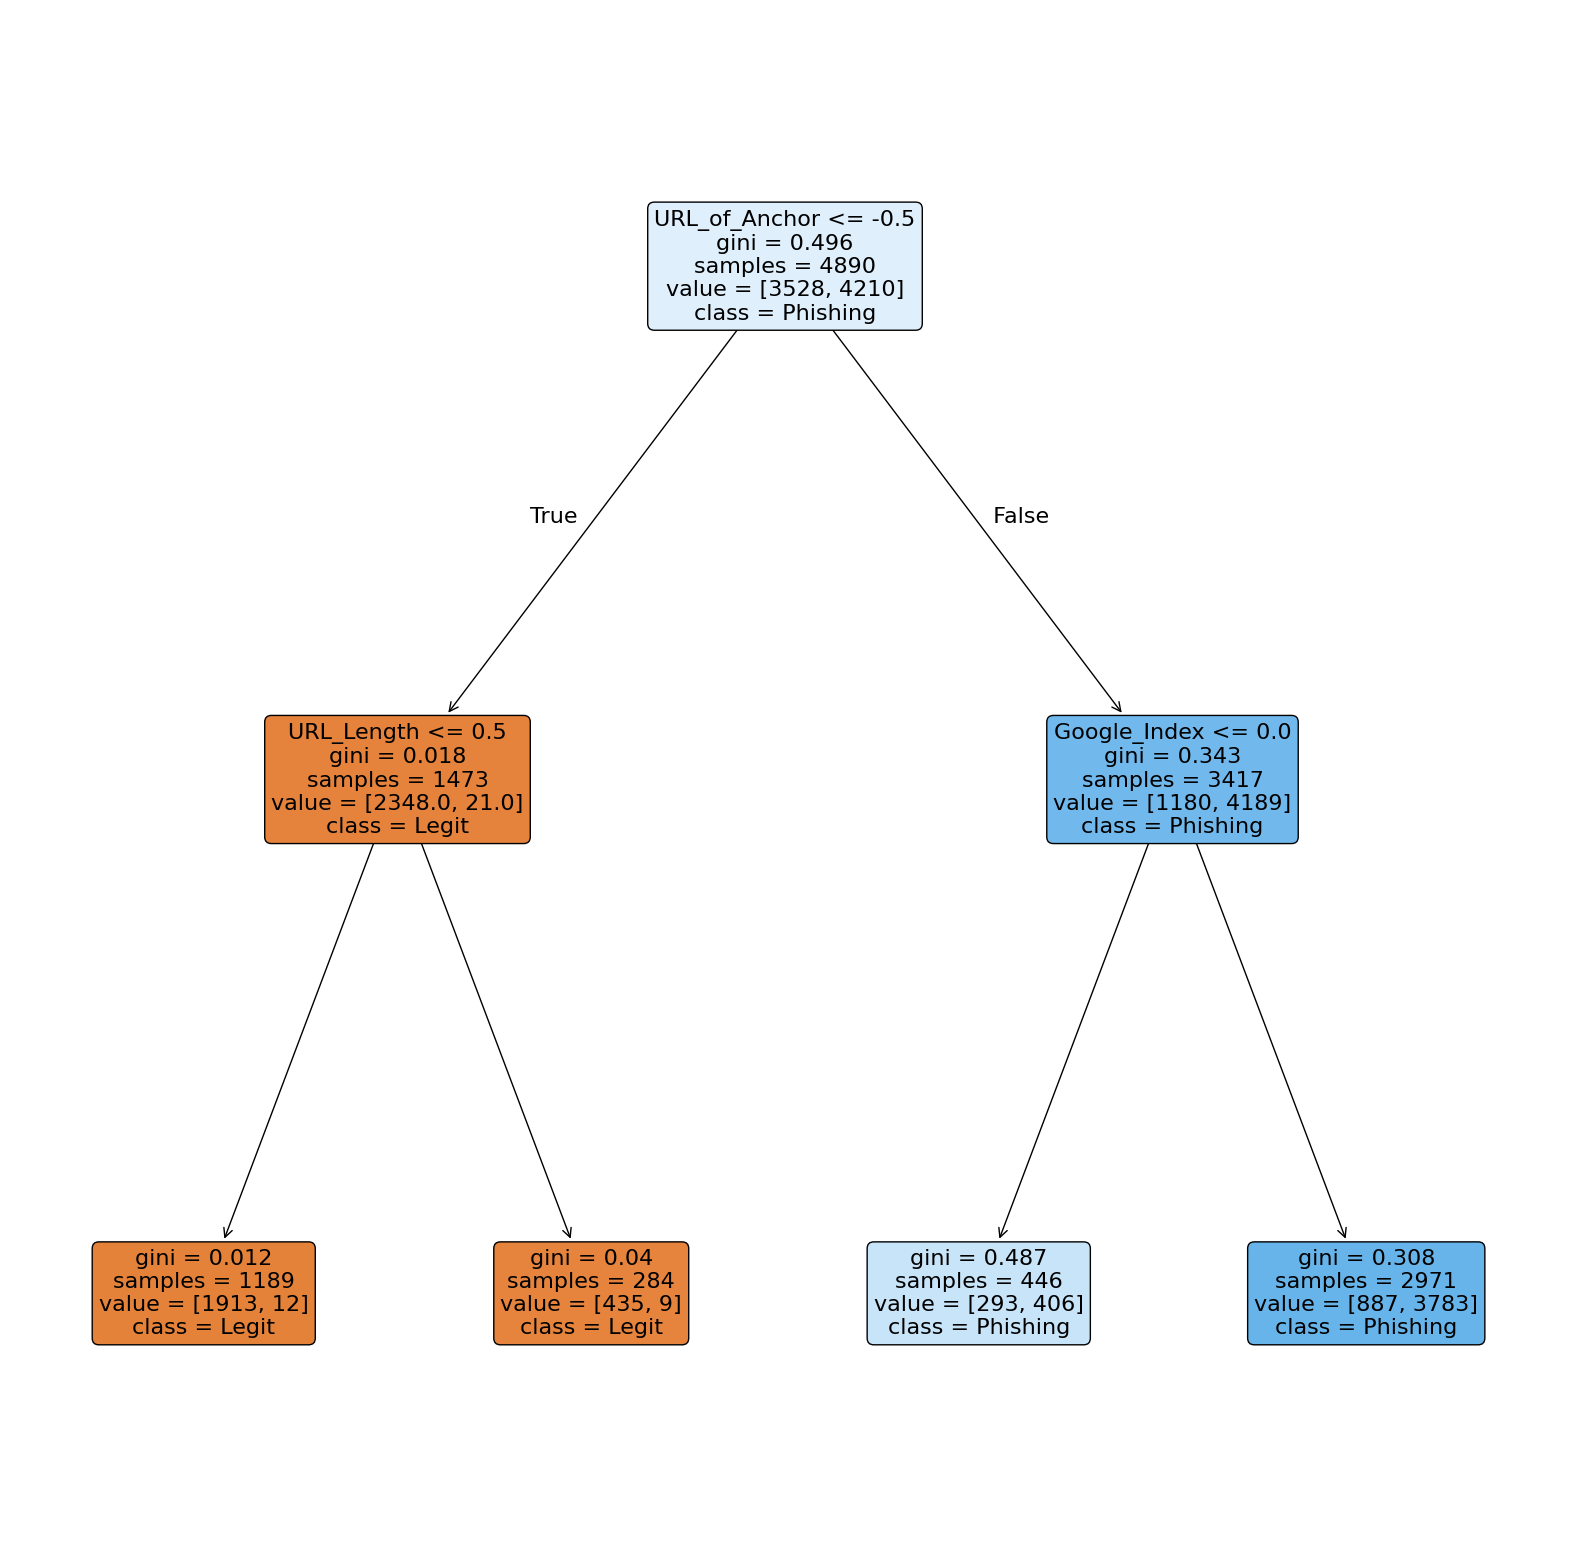

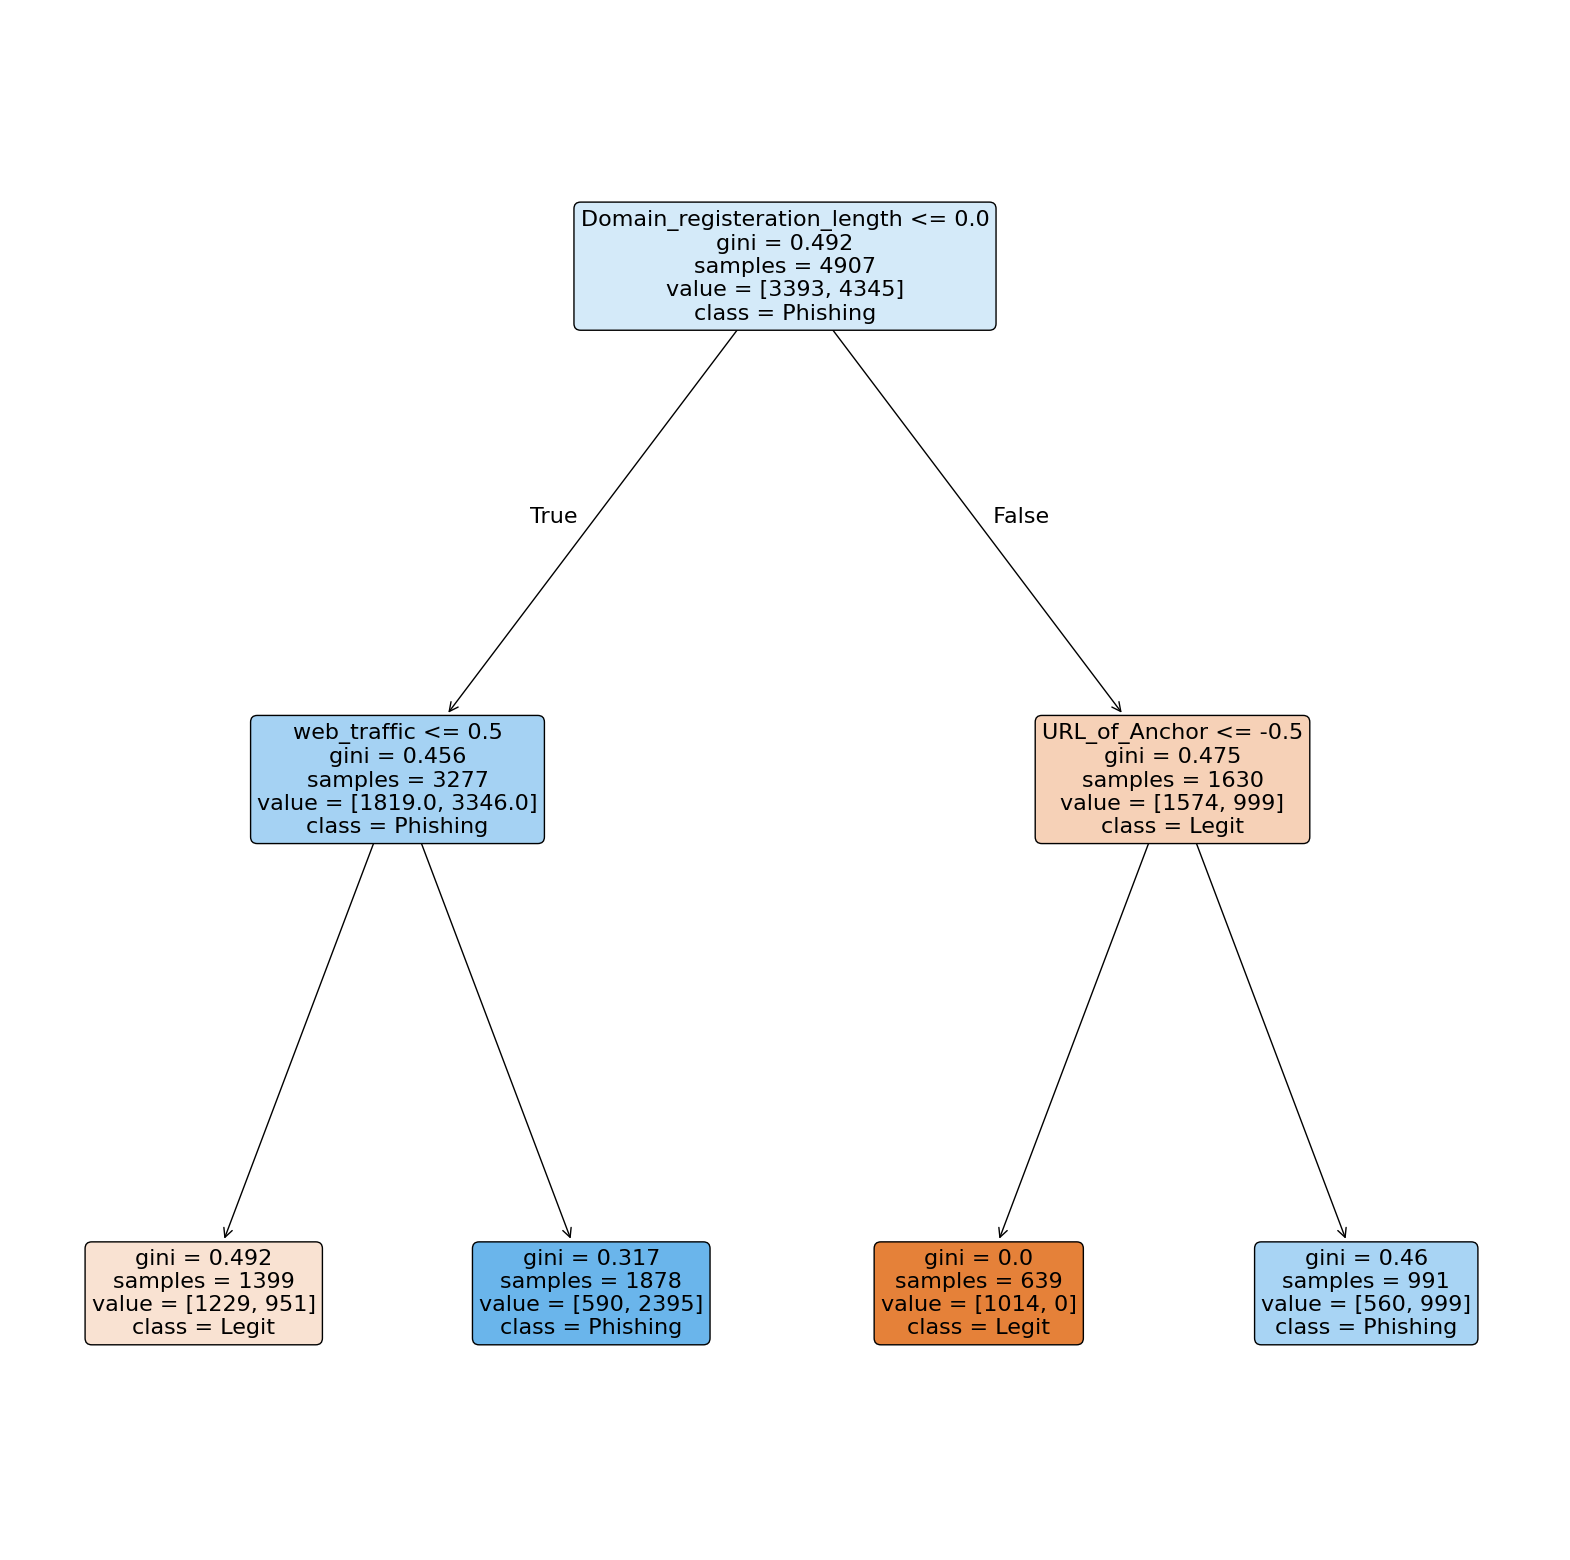

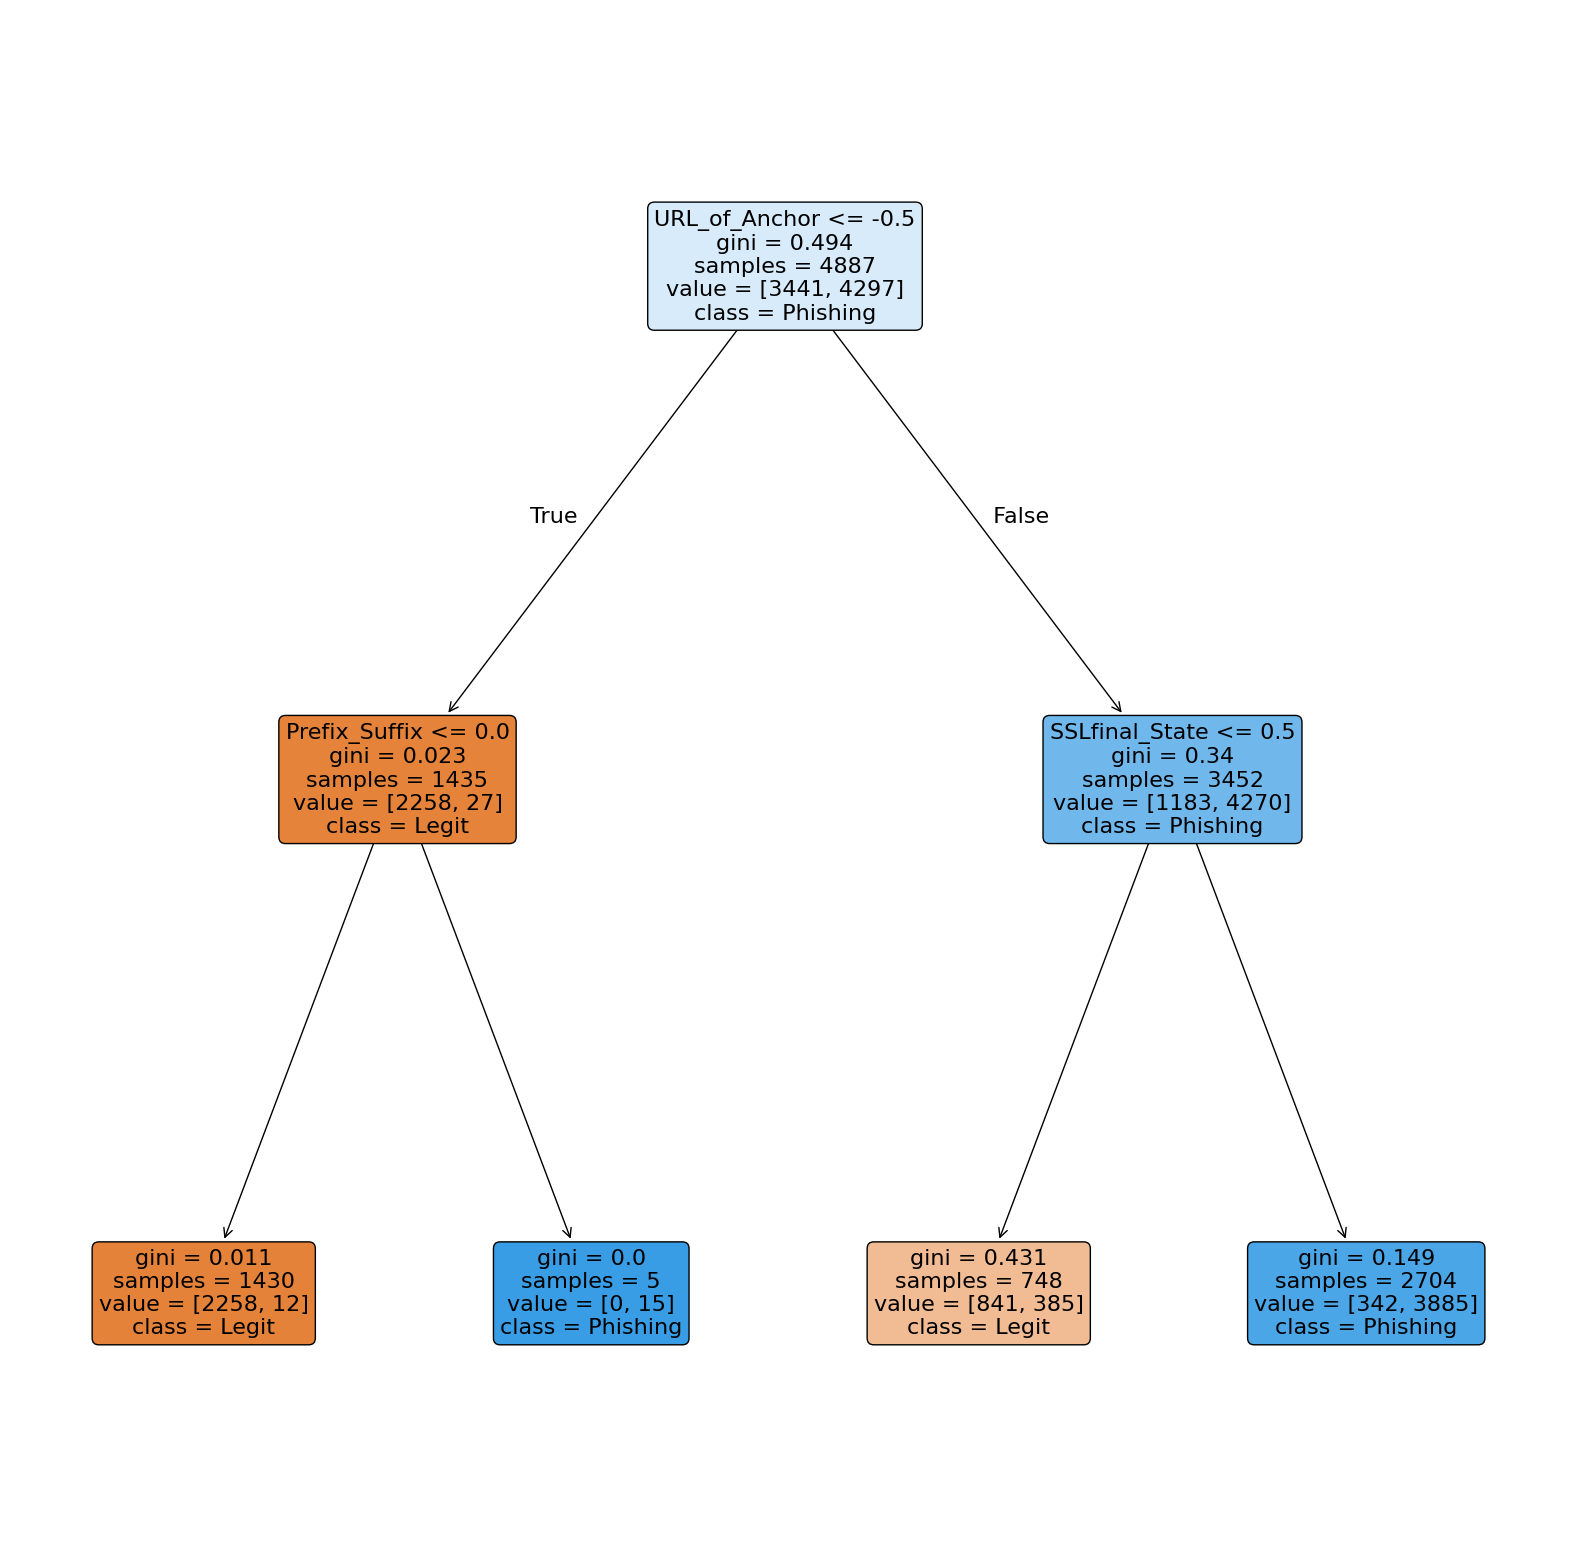

Accuracy: 0.85770274344287
F1 Score: 0.888045540796964

Classification Report:
               precision    recall  f1-score   support

          -1       0.98      0.68      0.80      1428
           1       0.80      0.99      0.89      1889

    accuracy                           0.86      3317
   macro avg       0.89      0.84      0.85      3317
weighted avg       0.88      0.86      0.85      3317



In [10]:
#Random Forest Comparison 

# Imports
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, f1_score

# Load the dataset
data = pd.read_csv("Phishing.csv")

# Split into features (X) and target (y)
x = data.drop("Result", axis=1)  # 'Result' should be your label column
y = data["Result"]

# Split into train/test
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

# Initialize Random Forest
rf = RandomForestClassifier(n_estimators=3, random_state=42, max_depth=2)

# Train the model
rf.fit(X_train, y_train)

# Predict on test data
y_pred = rf.predict(X_test)

# lets plot each tree in the random forest
from sklearn import tree
for tree_clf in rf.estimators_:
    plt.figure(figsize=(20, 20))
    tree.plot_tree(tree_clf, feature_names=x.columns, 
               class_names=['Legit', 'Phishing'], rounded=True, filled=True, fontsize=16)
    plt.show()

# Evaluate performance
print("Accuracy:", accuracy_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

                        Feature  Importance
13                URL_of_Anchor    0.721189
25                  web_traffic    0.104850
7                SSLfinal_State    0.087829
8   Domain_registeration_length    0.071842
27                 Google_Index    0.010544
5                 Prefix_Suffix    0.003722
1                    URL_Length    0.000023
3              having_At_Symbol    0.000000
4      double_slash_redirecting    0.000000
6             having_Sub_Domain    0.000000
9                       Favicon    0.000000
10                         port    0.000000
2            Shortining_Service    0.000000
0             having_IP_Address    0.000000
12                  Request_URL    0.000000
11                  HTTPS_token    0.000000
14                Links_in_tags    0.000000
15                          SFH    0.000000
18                     Redirect    0.000000
19                 on_mouseover    0.000000
16          Submitting_to_email    0.000000
17                 Abnormal_URL 

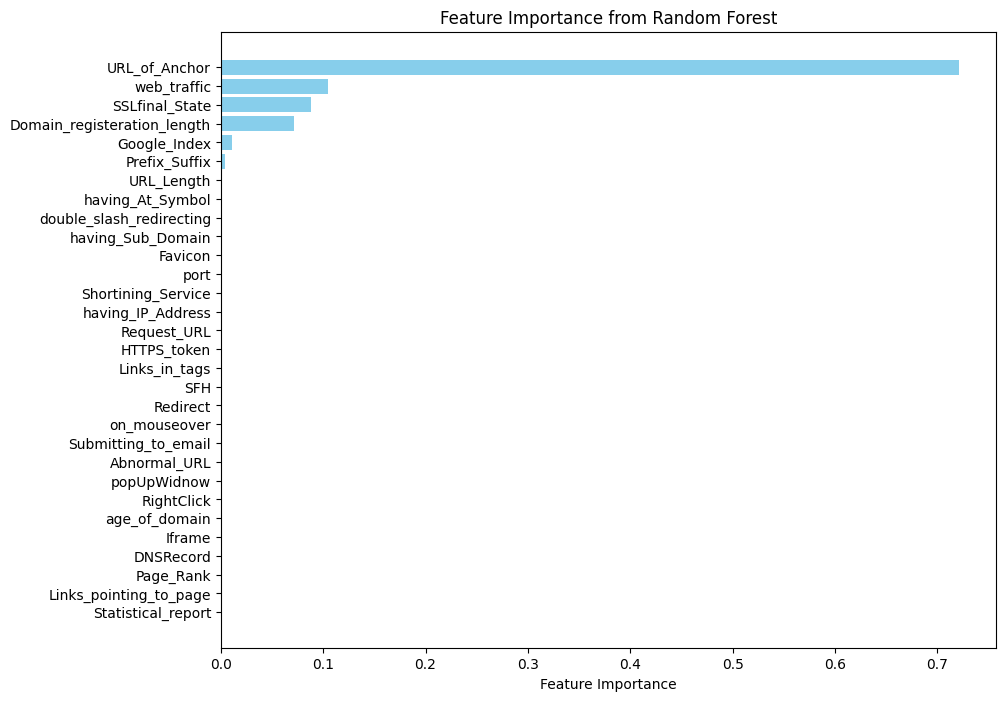

In [11]:
import pandas as pd
import matplotlib.pyplot as plt

# Get feature importances
importances = rf.feature_importances_

# Create a DataFrame for easier viewing
feature_importances = pd.DataFrame({
    'Feature': x.columns,
    'Importance': importances
})

# Sort features by importance
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

# Display the top features
print(feature_importances)

# Plot feature importances
plt.figure(figsize=(10, 8))
plt.barh(feature_importances['Feature'], feature_importances['Importance'], color='skyblue')
plt.gca().invert_yaxis()  # Highest importance at top
plt.xlabel('Feature Importance')
plt.title('Feature Importance from Random Forest')
plt.show()

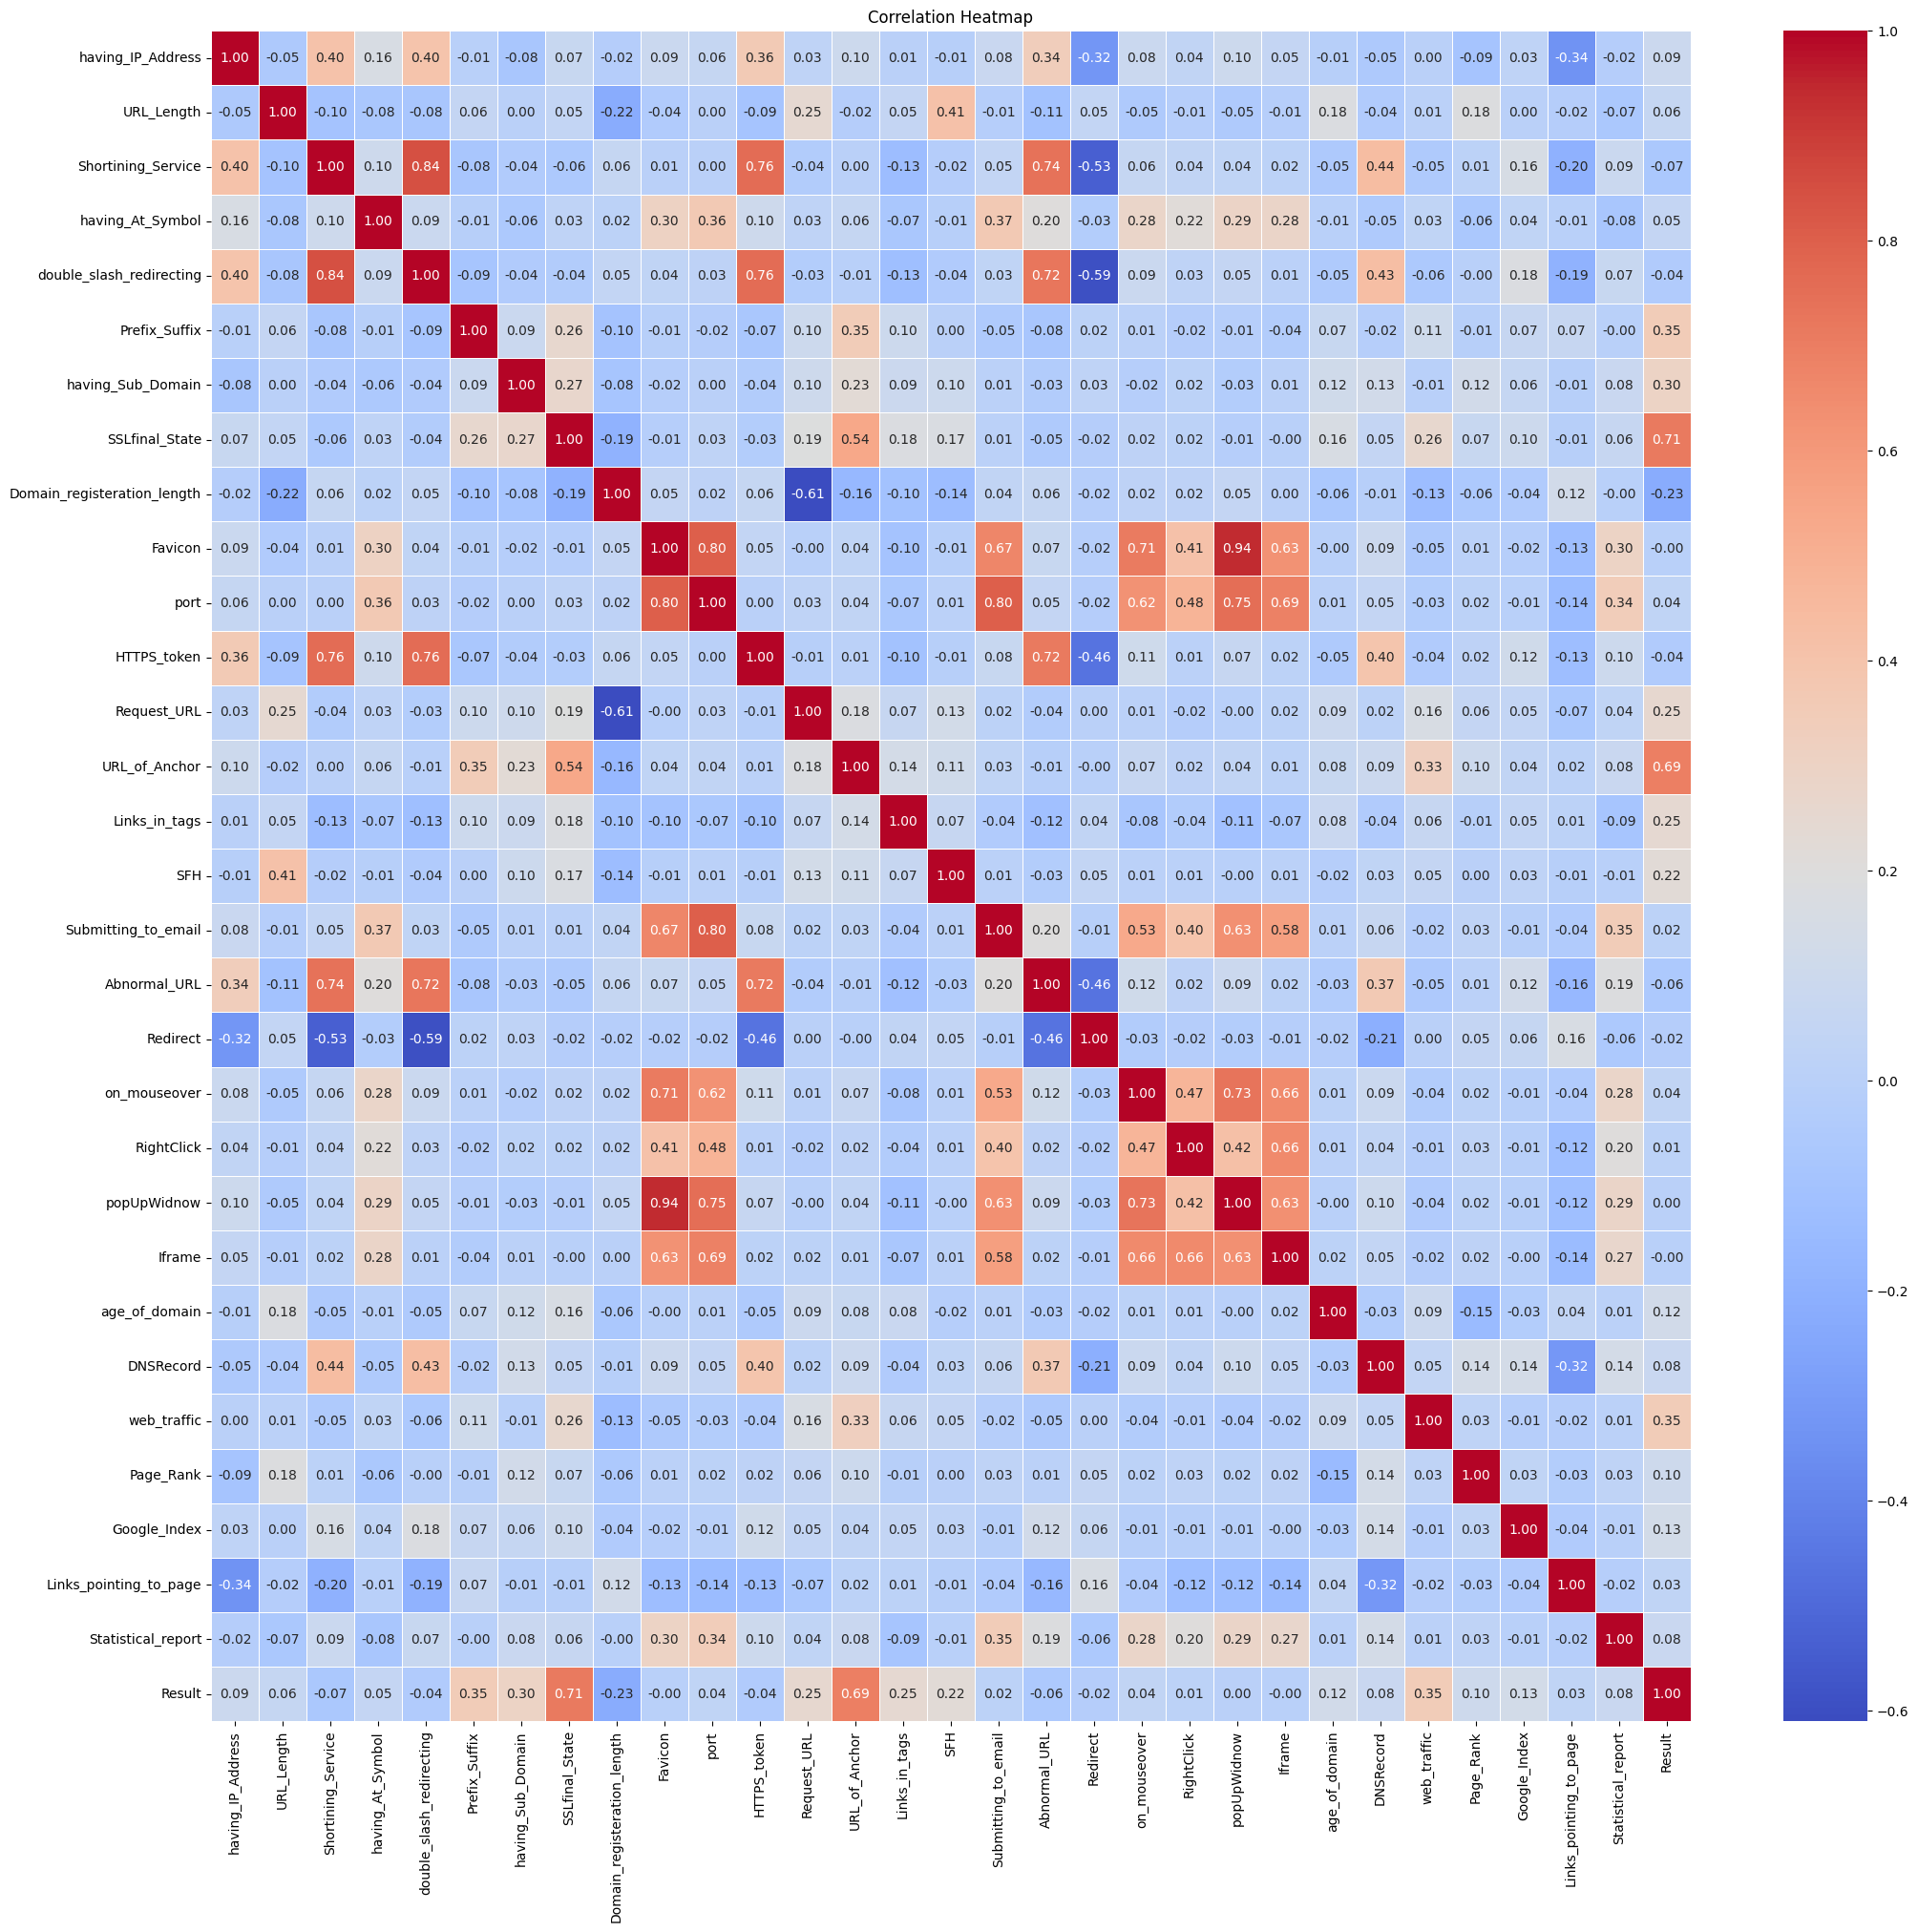

In [12]:
plt.figure(figsize=(25, 23)) # Adjust size as needed
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Heatmap')
plt.show()

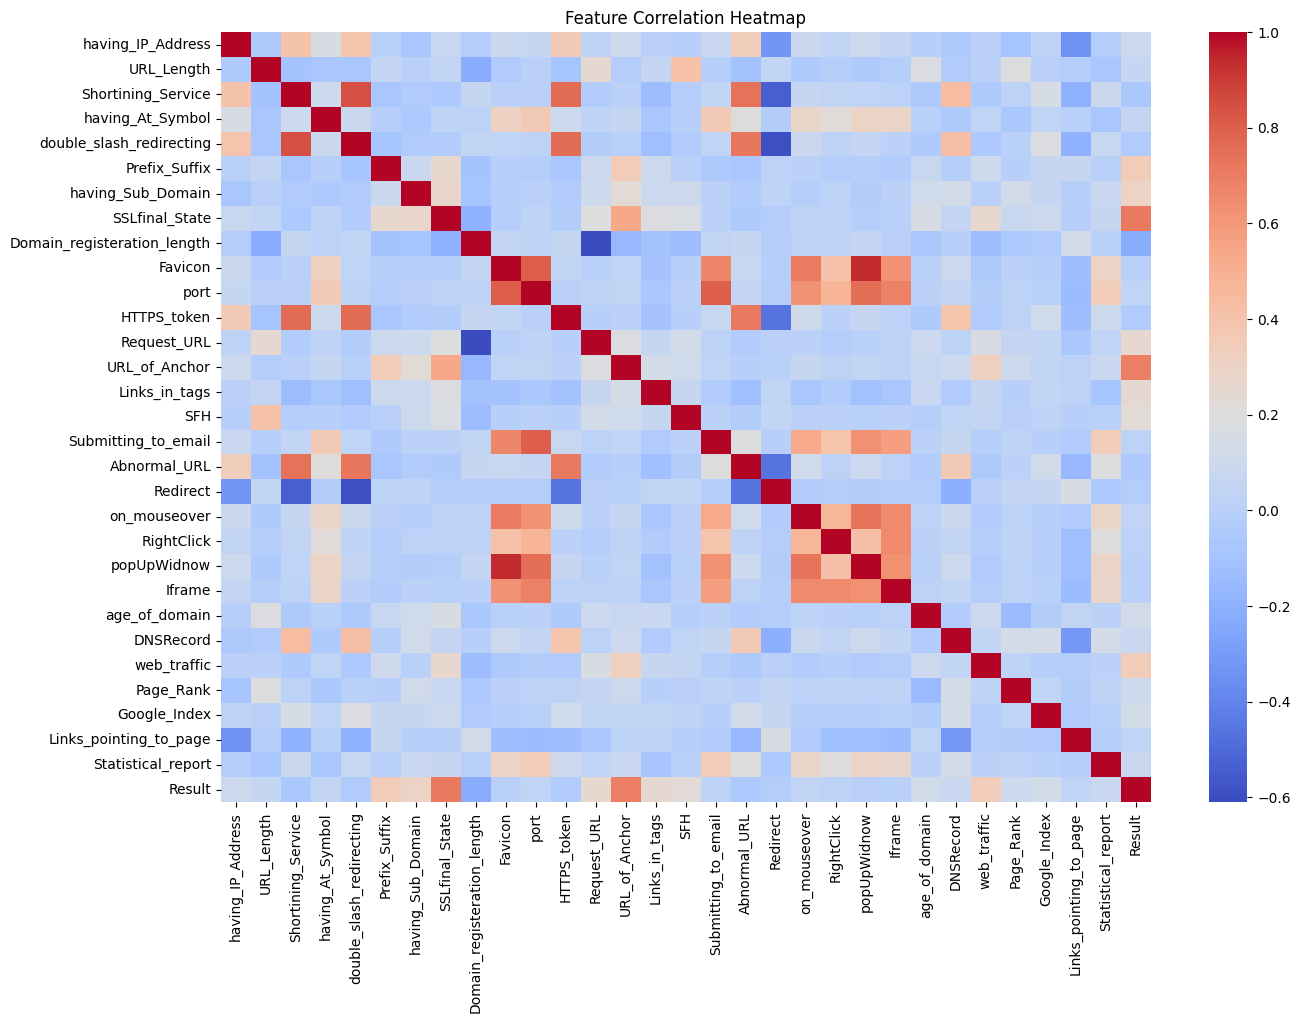

In [13]:
plt.figure(figsize=(15, 10))
correlation_matrix = df.corr()

# Heatmap visualization
sns.heatmap(correlation_matrix, cmap="coolwarm", annot=False)
plt.title("Feature Correlation Heatmap")
plt.show()

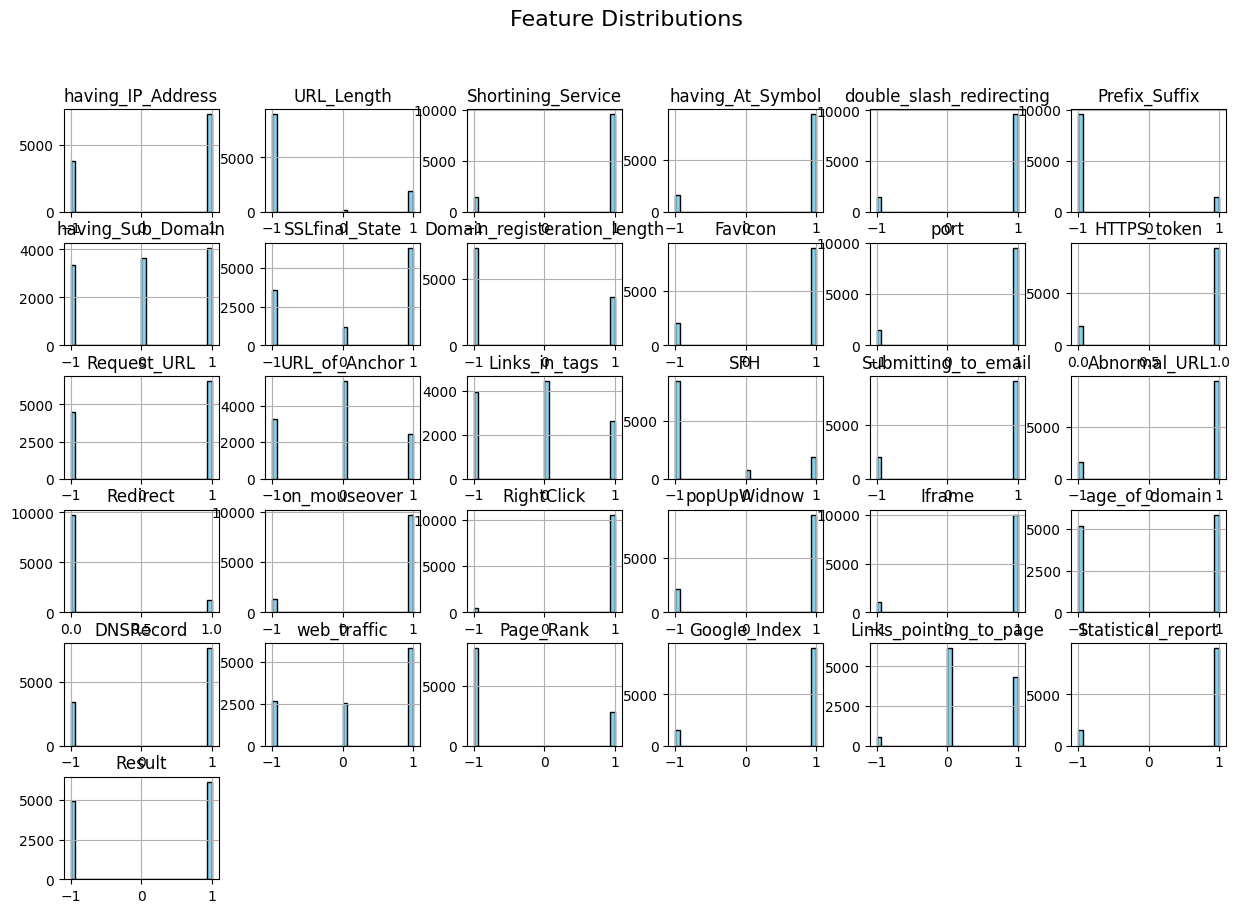

In [14]:
#Feature Distributions 

# Plot distribution of numerical features
df.hist(figsize=(15, 10), bins=30, color='skyblue', edgecolor='black')
plt.suptitle("Feature Distributions", fontsize=16)
plt.show()

In [15]:
#SMOTE Oversampling

from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
import pandas as pd

# Load and prepare your data
df = pd.read_csv("Phishing.csv").dropna()
X = df.drop("Result", axis=1)
y = df["Result"].astype(int)

# Split into training and testing BEFORE applying SMOTE
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Apply SMOTE to only the training data
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Check balance after SMOTE
print("After SMOTE:", y_train_smote.value_counts())

# Train model on SMOTE data
model = RandomForestClassifier(random_state=42)
model.fit(X_train_smote, y_train_smote)

# Evaluate on untouched test set
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

c:\Users\daves\miniconda3\envs\ml_env39\lib\site-packages\sklearn\base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(


After SMOTE: Result
-1    4926
 1    4926
Name: count, dtype: int64
              precision    recall  f1-score   support

          -1       0.98      0.96      0.97       980
           1       0.97      0.98      0.98      1231

    accuracy                           0.97      2211
   macro avg       0.97      0.97      0.97      2211
weighted avg       0.97      0.97      0.97      2211



In [16]:
#Pair Plot 

sns.pairplot(df.sample(500), hue="Result", palette="coolwarm", diag_kind="kde")
plt.show()

In [17]:
from sklearn.model_selection import train_test_split

# Define features and target variable
X = df.drop(columns=['Result'])  # Features
y = df['Result']  # Target (Phishing or Legitimate)

# Split the dataset (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training set size: {X_train.shape}")
print(f"Testing set size: {X_test.shape}")

Training set size: (8844, 30)
Testing set size: (2211, 30)


In [18]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Initialize the model
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate model performance
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.2f}")

print("\nClassification Report:\n", classification_report(y_test, y_pred))

Model Accuracy: 0.97

Classification Report:
               precision    recall  f1-score   support

          -1       0.97      0.95      0.96       956
           1       0.96      0.98      0.97      1255

    accuracy                           0.97      2211
   macro avg       0.97      0.97      0.97      2211
weighted avg       0.97      0.97      0.97      2211



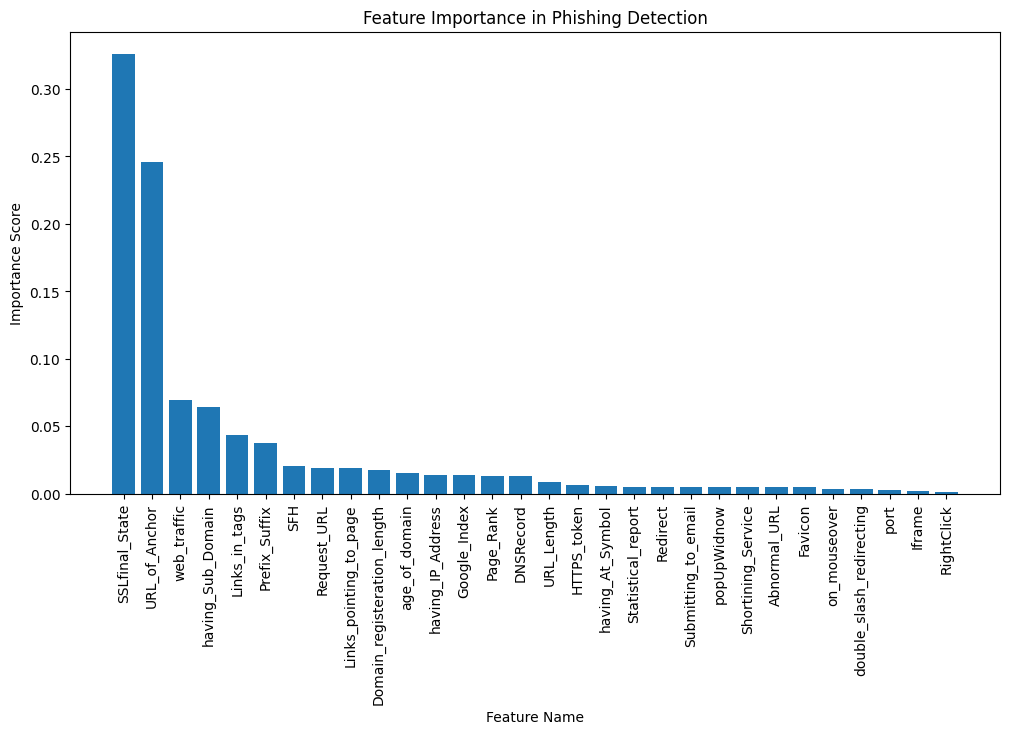

In [19]:
import numpy as np
import matplotlib.pyplot as plt

# Get feature importances from the trained model
feature_importance = model.feature_importances_

# Sort features by importance
sorted_indices = np.argsort(feature_importance)[::-1]
feature_names = X.columns

# Plot feature importance
plt.figure(figsize=(12, 6))
plt.title("Feature Importance in Phishing Detection")
plt.bar(range(X.shape[1]), feature_importance[sorted_indices], align="center")
plt.xticks(range(X.shape[1]), feature_names[sorted_indices], rotation=90)
plt.xlabel("Feature Name")
plt.ylabel("Importance Score")
plt.show()


In [20]:
# Load the saved model
import joblib

loaded_model = joblib.load("phishing_detector.pkl")

# Predict with new data
sample_data = X_test.iloc[0:1]  # Example: using first test sample
prediction = loaded_model.predict(sample_data)

print(f"Prediction: {'Phishing' if prediction[0] == -1 else 'Legitimate'}")

Prediction: Phishing


In [21]:
from sklearn.feature_selection import SelectKBest, f_classif

# Use ANOVA F-test for classification problems
selector = SelectKBest(score_func=f_classif, k=10)
X_new = selector.fit_transform(X, y)

# Show selected feature names
selected_features = X.columns[selector.get_support()]
print("Selected features:", selected_features)


Selected features: Index(['Prefix_Suffix', 'having_Sub_Domain', 'SSLfinal_State',
       'Domain_registeration_length', 'Request_URL', 'URL_of_Anchor',
       'Links_in_tags', 'SFH', 'web_traffic', 'Google_Index'],
      dtype='object')


In [22]:
from sklearn.ensemble import RandomForestClassifier
import numpy as np

model = RandomForestClassifier()
model.fit(X, y)

importances = model.feature_importances_
indices = np.argsort(importances)[::-1]

# Print top 10 ranked features
for i in range(10):
    print(f"{i + 1}. Feature: {X.columns[indices[i]]} ({importances[indices[i]]})")

1. Feature: SSLfinal_State (0.30872689117501767)
2. Feature: URL_of_Anchor (0.24911959768183686)
3. Feature: web_traffic (0.07836073665150119)
4. Feature: having_Sub_Domain (0.0657203525428224)
5. Feature: Prefix_Suffix (0.046131378587686914)
6. Feature: Links_in_tags (0.04275175963926403)
7. Feature: Request_URL (0.020310920691734475)
8. Feature: Links_pointing_to_page (0.019301035944093263)
9. Feature: SFH (0.018314071158076747)
10. Feature: Domain_registeration_length (0.0171854341932794)


In [23]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

# Load dataset
df = pd.read_csv("Phishing.csv")
df = df.dropna()

# Keep selected features
X_selected = X[selected_features]

# Feature/Target split
X = df.iloc[:, :-1]
y = df.iloc[:, -1].astype(int)  # ensure target is integer for classification

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Hyperparameter tuning with GridSearchCV
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'bootstrap': [True, False]
}

grid_search = GridSearchCV(RandomForestClassifier(), param_grid, cv=3, scoring='accuracy', n_jobs=-1, verbose=1)
grid_search.fit(X_train, y_train)

# Best model
best_model = grid_search.best_estimator_
print("Best Parameters:\n", grid_search.best_params_)

# Evaluate on test set
y_pred = best_model.predict(X_test)
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("ROC AUC Score:", roc_auc_score(y_test, y_pred))

Fitting 3 folds for each of 48 candidates, totalling 144 fits
Best Parameters:
 {'bootstrap': False, 'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}

Classification Report:
               precision    recall  f1-score   support

          -1       0.97      0.95      0.96       956
           1       0.96      0.98      0.97      1255

    accuracy                           0.97      2211
   macro avg       0.97      0.97      0.97      2211
weighted avg       0.97      0.97      0.97      2211

Confusion Matrix:
 [[ 910   46]
 [  27 1228]]
ROC AUC Score: 0.9651844504825884


In [24]:
print("Features used for training:")
print(selected_features)

print("\nExample samples from the dataset:")
print(X_selected.head())


Features used for training:
Index(['Prefix_Suffix', 'having_Sub_Domain', 'SSLfinal_State',
       'Domain_registeration_length', 'Request_URL', 'URL_of_Anchor',
       'Links_in_tags', 'SFH', 'web_traffic', 'Google_Index'],
      dtype='object')

Example samples from the dataset:
   Prefix_Suffix  having_Sub_Domain  SSLfinal_State  \
0             -1                 -1              -1   
1             -1                  0               1   
2             -1                 -1              -1   
3             -1                 -1              -1   
4             -1                  1               1   

   Domain_registeration_length  Request_URL  URL_of_Anchor  Links_in_tags  \
0                           -1            1             -1              1   
1                           -1            1              0             -1   
2                           -1            1              0             -1   
3                            1           -1              0              0   
4  

In [25]:
from sklearn.model_selection import GridSearchCV

# Define hyperparameters to tune
param_grid = {
    'n_estimators': [50, 100, 200],  # Number of trees
    'max_depth': [None, 10, 20],  # Tree depth
    'min_samples_split': [2, 5, 10],  # Min samples to split
    'min_samples_leaf': [1, 2, 4]  # Min samples per leaf
}

# Initialize GridSearch
grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5, n_jobs=-1, verbose=2)

# Train the model with Grid Search
grid_search.fit(X_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

# Train model with best parameters
best_model = RandomForestClassifier(**best_params, random_state=42)
best_model.fit(X_train, y_train)

# Evaluate optimized model
y_pred_best = best_model.predict(X_test)
accuracy_best = accuracy_score(y_test, y_pred_best)

print(f"Optimized Model Accuracy: {accuracy_best:.2f}")
print("\nOptimized Classification Report:\n", classification_report(y_test, y_pred_best))

Fitting 5 folds for each of 81 candidates, totalling 405 fits
Best Parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}
Optimized Model Accuracy: 0.97

Optimized Classification Report:
               precision    recall  f1-score   support

          -1       0.97      0.95      0.96       956
           1       0.96      0.98      0.97      1255

    accuracy                           0.97      2211
   macro avg       0.97      0.97      0.97      2211
weighted avg       0.97      0.97      0.97      2211



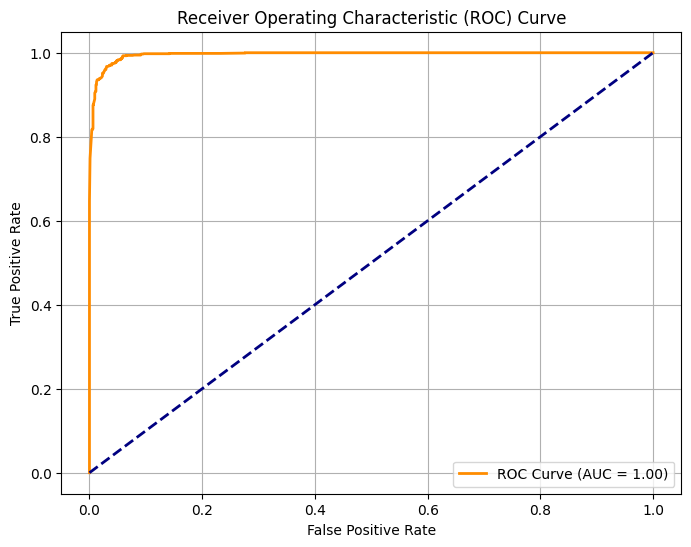

In [26]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Predict probability of the positive class (1 = Legitimate)
y_probs = best_model.predict_proba(X_test)[:, 1]

# Calculate ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_probs, pos_label=1)
roc_auc = auc(fpr, tpr)

# Plot ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f"ROC Curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic (ROC) Curve")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()


In [27]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier

# Decision Tree
clf = DecisionTreeClassifier(max_depth=5, min_samples_leaf=10, random_state=42)
clf.fit(X_train, y_train)

# Random Forest
best_rf = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)
best_rf.fit(X_train, y_train)

# Gradient Boosting
best_gb = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
best_gb.fit(X_train, y_train)

# AdaBoost
best_ada = AdaBoostClassifier(n_estimators=100, learning_rate=0.5, random_state=42)
best_ada.fit(X_train, y_train)

AdaBoostClassifier(learning_rate=0.5, n_estimators=100, random_state=42)

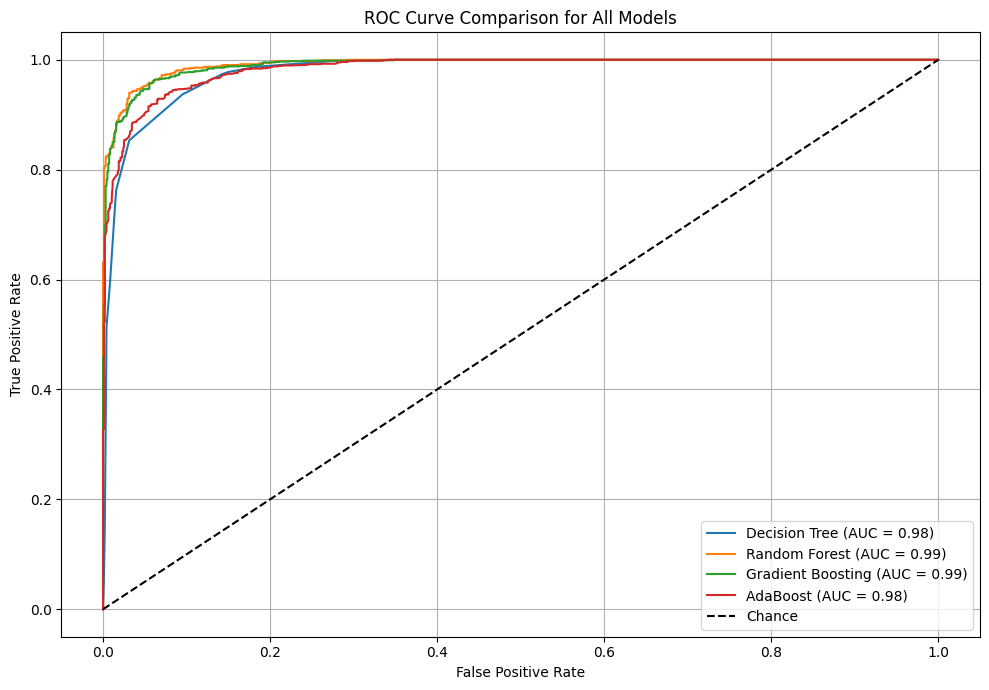

In [28]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize

# Assume these are already trained and defined
models = {
    'Decision Tree': clf,
    'Random Forest': best_rf,
    'Gradient Boosting': best_gb,
    'AdaBoost': best_ada
}

# Classes in your binary classification task
classes = np.unique(y_test)
n_classes = len(classes)

# Create a new plot
plt.figure(figsize=(10, 7))

# Loop through each model
for name, model in models.items():
    # Skip if model does not support predict_proba
    if not hasattr(model, "predict_proba"):
        continue

    # Get prediction probabilities
    y_score = model.predict_proba(X_test)

    if n_classes == 2:
        # Binary classification: use prob of positive class
        y_score_pos = y_score[:, 1]
        fpr, tpr, _ = roc_curve(y_test, y_score_pos, pos_label=1)
        roc_auc = auc(fpr, tpr)
    else:
        # Multi-class (rare in phishing, but just in case)
        y_bin = label_binarize(y_test, classes=classes)
        fpr, tpr, _ = roc_curve(y_bin.ravel(), y_score.ravel())
        roc_auc = auc(fpr, tpr)

    # Plot the ROC Curve
    plt.plot(fpr, tpr, label=f"{name} (AUC = {roc_auc:.2f})")

# Plot chance line
plt.plot([0, 1], [0, 1], 'k--', label='Chance')

# Plot settings
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve Comparison for All Models")
plt.legend(loc="lower right")
plt.grid(True)
plt.tight_layout()
plt.show()

In [29]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
import pandas as pd

# Load and prepare your data
df = pd.read_csv("Phishing.csv").dropna()
X = df.drop("Result", axis=1)
y = df["Result"].astype(int)

# Split into training and testing BEFORE applying SMOTE
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Apply SMOTE to only the training data
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Check balance after SMOTE
print("After SMOTE:", y_train_smote.value_counts())

# Train model on SMOTE data
model = RandomForestClassifier(random_state=42)
model.fit(X_train_smote, y_train_smote)

# Evaluate on untouched test set
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))


c:\Users\daves\miniconda3\envs\ml_env39\lib\site-packages\sklearn\base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(


After SMOTE: Result
-1    4926
 1    4926
Name: count, dtype: int64
              precision    recall  f1-score   support

          -1       0.98      0.96      0.97       980
           1       0.97      0.98      0.98      1231

    accuracy                           0.97      2211
   macro avg       0.97      0.97      0.97      2211
weighted avg       0.97      0.97      0.97      2211

